In [1]:
import pandas as pd 

df=pd.read_csv(r"C:\Users\ASUS\Documents\Ml_prs\datasets\Iris.csv");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore") 

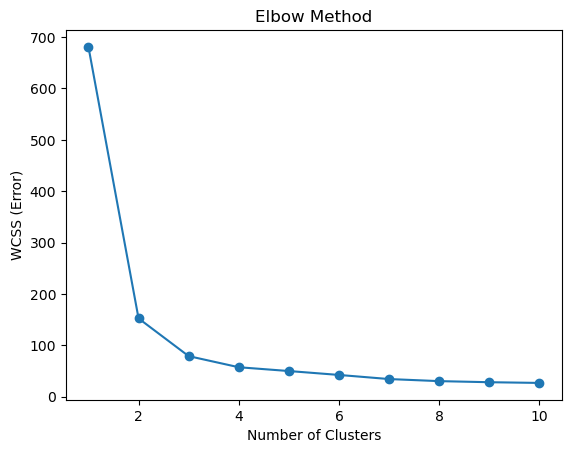

In [27]:
# ---------------- Step 3: Select only useful columns ----------------
# Use only 4 numeric features (ignore Id and Species)
X = df.iloc[:, [1, 2, 3, 4]].values

# ---------------- Step 4: Find best number of clusters (Elbow Method) ----------------
wcss = []                      # To store total distance (error) for each cluster count

for i in range(1, 11):         # Try cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)              # Run K-Means on data
    wcss.append(kmeans.inertia_)  # Save how well data fits (inertia = error)

# Draw elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Error)')
plt.show()

# 👀 The "bend" (elbow) point in graph shows best number of clusters (usually 3).

# ---------------- Step 5: Apply K-Means with 3 clusters ----------------
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)   # Assign each flower to a cluster (0,1,2)

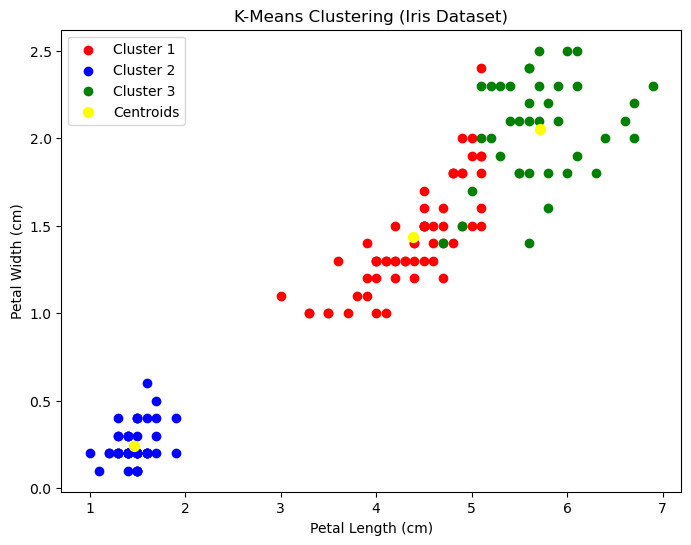

In [31]:

# ---------------- Step 6: Visualize the clusters ----------------
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], color='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], color='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], color='green', label='Cluster 3')

# Show the center points of each cluster
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s=200, color='yellow', marker='.', label='Centroids')

plt.title('K-Means Clustering (Iris Dataset)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()


In [33]:
df['Cluster'] = y_kmeans
print(df[['Species', 'Cluster']].head(10))


# Cluster 0 ≈ Iris-setosa
# Cluster 1 ≈ Iris-versicolor
# Cluster 2 ≈ Iris-virginica

       Species  Cluster
0  Iris-setosa        1
1  Iris-setosa        1
2  Iris-setosa        1
3  Iris-setosa        1
4  Iris-setosa        1
5  Iris-setosa        1
6  Iris-setosa        1
7  Iris-setosa        1
8  Iris-setosa        1
9  Iris-setosa        1


In [ ]:
We applied the K-Means clustering algorithm on the Iris dataset using its four numeric features — Sepal Length, Sepal Width, Petal Length, and Petal Width.
Using the Elbow Method, we found that the optimal number of clusters is 3.
When we visualized the clusters, we saw three clear groups that roughly correspond to the three species: Setosa, Versicolor, and Virginica